In [33]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [ ]:
df=pd.read_csv('/content/metadata.csv')
df.head(10)

,type,start_time,ambient_temperature,battery_id,test_id,uid,filename,Capacity,Re,Rct
0,discharge,[2010. 7. 21. 15. 0. ...,4,B0047,0,1,00001.csv,1.6743047446975208,NaN,NaN
1,impedance,[2010. 7. 21. 16. 53. ...,24,B0047,1,2,00002.csv,NaN,0.05605783343888099,0.20097016584458333
2,charge,[2010. 7. 21. 17. 25. ...,4,B0047,2,3,00003.csv,NaN,NaN,NaN
3,impedance,[2010 7 21 20 31 5],24,B0047,3,4,00004.csv,NaN,0.05319185850921101,0.16473399914864734
4,discharge,[2.0100e+03 7.0000e+00 2.1000e+01 2.1000e+01 2...,4,B0047,4,5,00005.csv,1.5243662105099023,NaN,NaN
5,charge,[2010. 7. 21. 22. 38. ...,4,B0047,5,6,00006.csv,NaN,NaN,NaN
6,discharge,[2.010e+03 7.000e+00 2.200e+01 1.000e+00 4.000...,4,B0047,6,7,00007.csv,1.5080762969973425,NaN,NaN
7,charge,[2010. 7. 22. 3. 14. ...,4,B0047,7,8,00008.csv,NaN,NaN,NaN
8,discharge,[2010. 7. 22. 6. 16. ...,4,B0047,8,9,00009.csv,1.4835577960067696,NaN,NaN
9,charge,[2010. 7. 22. 7. 50. ...,4,B0047,9,10,00010.csv,NaN,NaN,NaN


In [ ]:
df.shape

(7565, 10)

In [ ]:
df = df.drop(['start_time','battery_id','uid','test_id','filename'], axis=1)
df

,type,ambient_temperature,Capacity,Re,Rct
0,discharge,4,1.6743047446975208,NaN,NaN
1,impedance,24,NaN,0.05605783343888099,0.20097016584458333
2,charge,4,NaN,NaN,NaN
3,impedance,24,NaN,0.05319185850921101,0.16473399914864734
4,discharge,4,1.5243662105099023,NaN,NaN
...,...,...,...,...,...
7560,impedance,24,NaN,0.0968087979207628,0.15489738203707232
7561,discharge,4,1.0201379996149256,NaN,NaN
7562,charge,4,NaN,NaN,NaN
7563,discharge,4,0.9907591663373165,NaN,NaN


In [ ]:
df.isnull().sum()

,0
type,0
ambient_temperature,0
Capacity,4771
Re,5609
Rct,5609


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7565 entries, 0 to 7564
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   type                 7565 non-null   object
 1   ambient_temperature  7565 non-null   int64 
 2   Capacity             2794 non-null   object
 3   Re                   1956 non-null   object
 4   Rct                  1956 non-null   object
dtypes: int64(1), object(4)
memory usage: 295.6+ KB


In [ ]:
df['Re']= pd.to_numeric(df['Re'], errors='coerce')
df['Rct']=pd.to_numeric(df['Rct'], errors='coerce')
df['Capacity']=pd.to_numeric(df['Capacity'], errors= 'coerce')

In [ ]:
df['Re'].fillna(df['Re'].mean(),inplace=True)
df['Rct'].fillna(df['Rct'].mean(),inplace=True)
df['Capacity'].fillna(df['Capacity'].mean(),inplace=True)

/tmp/ipython-input-2236989124.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Re'].fillna(df['Re'].mean(),inplace=True)
/tmp/ipython-input-2236989124.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using

In [ ]:
df.isnull().sum()

,0
type,0
ambient_temperature,0
Capacity,0
Re,0
Rct,0


In [ ]:
df['type'].value_counts()

,count
type,
charge,2815
discharge,2794
impedance,1956


In [ ]:
label_encoder = LabelEncoder()
df['type'] = label_encoder.fit_transform(df['type'])
df.head()

,type,ambient_temperature,Capacity,Re,Rct
0,1,4,1.674305,-4.976500e+11,1.055903e+12
1,2,24,1.326543,5.605783e-02,2.009702e-01
2,0,4,1.326543,-4.976500e+11,1.055903e+12
3,2,24,1.326543,5.319186e-02,1.647340e-01
4,1,4,1.524366,-4.976500e+11,1.055903e+12


In [ ]:
X=df.drop(columns=['ambient_temperature'])
y=df['ambient_temperature']

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')

X_train shape: (6052, 4)
X_test shape: (1513, 4)


In [ ]:
scaler= MinMaxScaler()

X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled= scaler.transform(X_test)

print(f'Scaled X_train: {X_train_scaled[:5]}')


Scaled X_train: [[1.00000000e+00 5.02450122e-01 9.99999999e-01 1.98111482e-10]
 [5.00000000e-01 4.55998175e-01 0.00000000e+00 1.00000000e+00]
 [5.00000000e-01 3.60527766e-02 0.00000000e+00 1.00000000e+00]
 [0.00000000e+00 5.02450122e-01 0.00000000e+00 1.00000000e+00]
 [5.00000000e-01 5.35874070e-01 0.00000000e+00 1.00000000e+00]]


In [ ]:
model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=X_train_scaled.shape[1]))
model.add(Dropout(0.2))
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=1, activation='linear'))

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,433 (9.50 KB)

 Trainable params: 2,433 (9.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history= model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_data=(X_test_scaled,y_test))

Epoch 1/100
190/190 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 88.4520 - val_loss: 2526.4497
Epoch 2/100
190/190 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 83.7332 - val_loss: 2693.9685
Epoch 3/100
190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 84.7797 - val_loss: 2598.4817
Epoch 4/100
190/190 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 85.7268 - val_loss: 2188.2153
Epoch 5/100
190/190 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 84.9662 - val_loss: 1958.4086
Epoch 6/100
190/190 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 85.2976 - val_loss: 1910.2675
Epoch 7/100
190/190 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 87.7460 - val_loss: 2452.1899
Epoch 8/100
190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 81.5566 - val_loss: 2278.3511
Epoch 9/100
190/190 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 86.1274 - val_loss: 2037.9934
Epoch 10/100
190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 85.0829 - val_loss: 2255.9937
Epoch 11/100
190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 87.4290 - val_loss: 1862.67

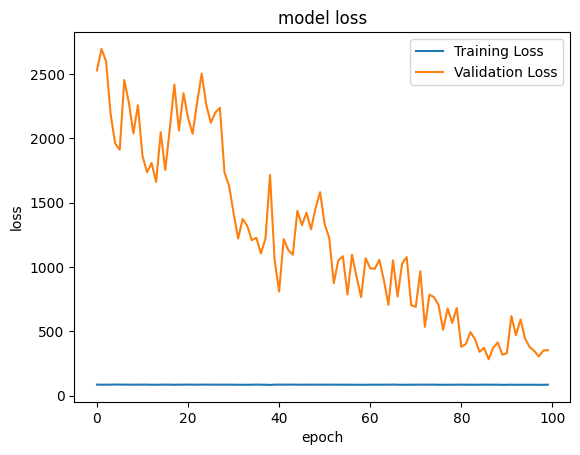

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label= 'Validation Loss')
plt.legend()
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
model.evaluate(X_test_scaled, y_test)

48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 992.0636 


352.82977294921875

In [35]:
import numpy as np
def predict_battery_life(type_discharge, Capacity, Re, Rct, label_encoder,scaler, model):
  type_discharge_encoded=label_encoder.transform([type_discharge])[0]

  X_input= np.array([[type_discharge_encoded,Capacity,Re,Rct]])
  X_input_scaled= scaler.transform(X_input)

  predicted_battery_life= model.predict(X_input_scaled)

  return predicted_battery_life[0][0]

In [36]:
type_discharge = 'discharge'
Capacity=1.674305
Re= -4.976500e+11
Rct= 1.055903e+12

predicted_battery_life= predict_battery_life(type_discharge,Capacity,Re,Rct,label_encoder,scaler,model)
print(f'Predicted Battery Life: {predicted_battery_life}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
Predicted Battery Life: 26.92933464050293


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [43]:
import pickle
with open('label_encoder.pkl', 'wb') as encoder_file:
  pickle.dump(label_encoder, encoder_file)

with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

with open('model.pkl', 'wb') as model_file:
      pickle.dump(model, model_file)